In [1]:
# Author：Sugulu
# Date：created 11月12日2017年
# のび太FX第3話　線形回帰モデルでFX予測1　

# 一度変数を初期化しておきます「yを押してenterしてください」
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# import関連
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 実行上問題ない注意は非表示にする

%matplotlib inline

In [3]:
# dataフォルダの場所を各自指定してください
data_dir = "./"
data = pd.read_csv(data_dir + "USDJPY_1997_2017.csv") # FXデータの読み込み（データは同じリポジトリのdataフォルダに入っています）
data.head() # データの概要を見てみます

,Date,Open,High,Low,Close
0,1997/1/2,115.85,116.20,115.28,115.60
1,1997/1/3,115.65,116.70,115.35,116.28
2,1997/1/6,116.75,116.98,115.38,115.75
3,1997/1/7,115.74,116.02,114.80,115.25
4,1997/1/8,115.22,116.00,114.90,115.73


In [4]:
# pandasのDataFrameのままでは、扱いにくい+実行速度が遅いので、numpyに変換して処理します
data2 = np.array(data)

In [5]:
# 移動平均をpandasのままも出せますが、有効桁数が減る？のか、精度が少しさがります。
# 5, 25, 75, 200日の移動平均を追加します
#data['5ave'] = pd.rolling_mean(data['Close'], 5, min_periods=1) 
#data['25ave'] = pd.rolling_mean(data['Close'], 25, min_periods=1)
#data['75ave'] = pd.rolling_mean(data['Close'], 75, min_periods=1)
#data['200ave'] = pd.rolling_mean(data['Close'], 200, min_periods=1)

In [6]:
# 5日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 5
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float) # pythonは0番目からindexが始まります
    data2[i,5] = np.mean(tmp)

In [7]:
# 25日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))]
ave_day = 25
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,6] = np.mean(tmp)

# 75日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 75
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,7] = np.mean(tmp)
    
# 200日移動平均線を追加します
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
ave_day = 200
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,8] = np.mean(tmp)

In [8]:
# 一目均衡表を追加します (9,26,52) 
para1 =9
para2 = 26
para3 = 52

# 転換線 = （過去(para1)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))] # 列の追加
for i in range(para1, len(data2)):
    tmp_high =data2[i-para1+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para1+1:i+1,3].astype(np.float)
    data2[i,9] = (np.max(tmp_high) + np.min(tmp_low)) / 2 
    
# 基準線 = （過去(para2)日間の高値 + 安値） ÷ 2
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para2, len(data2)):
    tmp_high =data2[i-para2+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para2+1:i+1,3].astype(np.float)
    data2[i,10] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

# 先行スパン1 = ｛ （転換値+基準値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(0, len(data2)-para2):
    tmp =(data2[i,9] + data2[i,10]) / 2 
    data2[i+para2,11] = tmp


# 先行スパン2 = ｛ （過去(para3)日間の高値+安値） ÷ 2 ｝を(para2)日先にずらしたもの
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para3, len(data2)-para2):
    tmp_high =data2[i-para3+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para3+1:i+1,3].astype(np.float)
    data2[i+para2,12] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

In [9]:
# 25日ボリンジャーバンド（±1, 2シグマ）を追加します
parab = 25
data2 = np.c_[data2, np.zeros((len(data2),4))] # 列の追加
for i in range(parab, len(data2)):
    tmp = data2[i-parab+1:i+1,4].astype(np.float)
    data2[i,13] = np.mean(tmp) + 1.0* np.std(tmp) 
    data2[i,14] = np.mean(tmp) - 1.0* np.std(tmp) 
    data2[i,15] = np.mean(tmp) + 2.0* np.std(tmp) 
    data2[i,16] = np.mean(tmp) - 2.0* np.std(tmp) 


In [10]:
# データの内容を見ます
data_show=pd.DataFrame(data2)
data_show

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1997/1/2,115.85,116.2,115.28,115.6,0,0,0,0,0,0,0,0,0,0,0,0
1,1997/1/3,115.65,116.7,115.35,116.28,0,0,0,0,0,0,0,0,0,0,0,0
2,1997/1/6,116.75,116.98,115.38,115.75,0,0,0,0,0,0,0,0,0,0,0,0
3,1997/1/7,115.74,116.02,114.8,115.25,0,0,0,0,0,0,0,0,0,0,0,0
4,1997/1/8,115.22,116,114.9,115.73,0,0,0,0,0,0,0,0,0,0,0,0
5,1997/1/9,115.83,116.45,115.65,116.36,115.874,0,0,0,0,0,0,0,0,0,0,0
6,1997/1/10,116.37,116.67,115.24,116.05,115.828,0,0,0,0,0,0,0,0,0,0,0
7,1997/1/13,116.05,116.54,115.85,116.45,115.968,0,0,0,0,0,0,0,0,0,0,0
8,1997/1/14,116.21,117.04,116.2,116.86,116.29,0,0,0,0,0,0,0,0,0,0,0
9,1997/1/15,116.93,117.48,116.7,116.85,116.514,0,0,0,116.14,0,0,0,0,0,0,0


In [11]:
# 説明変数となる行列Xを作成します
day_ago = 25 # 何日前までのデータを使用するのかを設定
num_sihyou = 1 + 4 + 4 +4 # 終値1本、MVave4本、itimoku4本、ボリンジャー4本

X = np.zeros((len(data2), day_ago*num_sihyou)) 

for s in range(0, num_sihyou): # 日にちごとに横向きに並べる
    for i in range(0, day_ago):
        X[i:len(data2),day_ago*s+i] = data2[0:len(data2)-i,s+4]

In [12]:
# Xの確認です
#data_show = pd.DataFrame(X)
#data_show

In [13]:
# 被説明変数となる Y = pre_day後の終値-当日終値 を作成します
Y = np.zeros(len(data2))

# 何日後を値段の差を予測するのか決めます
pre_day = 1
Y[0:len(Y)-pre_day] = X[pre_day:len(X),0] - X[0:len(X)-pre_day,0]

In [14]:
# 【重要】X, Yを正規化します
original_X = np.copy(X) # コピーするときは、そのままイコールではダメ
tmp_mean = np.zeros(len(X))

for i in range(day_ago,len(X)):
    tmp_mean[i] = np.mean(original_X[i-day_ago+1:i+1,0]) # 25日分の平均値
    for j in range(0, X.shape[1]): 
        X[i,j] = (X[i,j] - tmp_mean[i]) # Xを正規化
    Y[i] =  Y[i]  # X同士の引き算しているので、Yはそのまま

In [15]:
# Xの確認です
#data_show = pd.DataFrame(X)
#data_show

In [16]:
# XとYを学習データとテストデータ(2017年～)に分ける
X_train = X[200:5193,:] # 200日平均を使うので、それ以降を学習データに使用します
Y_train = Y[200:5193] 

X_test = X[5193:len(X)-pre_day,:] 
Y_test = Y[5193:len(Y)-pre_day]

In [17]:
# 2017年のデータを見てみます
data_show=pd.DataFrame(X_test)
data_show

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,1.57756,1.13656,0.81756,1.32256,1.72156,1.64456,1.81056,1.73656,2.14256,1.35056,...,-11.112878,-12.056739,-12.941996,-13.652175,-14.140798,-14.445167,-14.714758,-14.803114,-14.868481,-15.049901
1,1.72480,1.34280,0.90180,0.58280,1.08780,1.48680,1.40980,1.57580,1.50180,1.90780,...,-10.534689,-11.347638,-12.291499,-13.176756,-13.886935,-14.375558,-14.679927,-14.949518,-15.037874,-15.103241
2,1.10948,1.53448,1.15248,0.71148,0.39248,0.89748,1.29648,1.21948,1.38548,1.31148,...,-9.926350,-10.725009,-11.537958,-12.481819,-13.367076,-14.077255,-14.565878,-14.870247,-15.139838,-15.228194
3,-0.76116,1.06684,1.49184,1.10984,0.66884,0.34984,0.85484,1.25384,1.17684,1.34284,...,-9.310332,-9.968990,-10.767649,-11.580598,-12.524459,-13.409716,-14.119895,-14.608518,-14.912887,-15.182478
4,0.67720,-0.87380,0.95420,1.37920,0.99720,0.55620,0.23720,0.74220,1.14120,1.06420,...,-8.979596,-9.422972,-10.081630,-10.880289,-11.693238,-12.637099,-13.522356,-14.232535,-14.721158,-15.025527
5,-0.49888,0.58312,-0.96788,0.86012,1.28512,0.90312,0.46212,0.14312,0.64812,1.04712,...,-8.429918,-9.073676,-9.517052,-10.175710,-10.974369,-11.787318,-12.731179,-13.616436,-14.326615,-14.815238
6,-0.66072,-0.57972,0.50228,-1.04872,0.77928,1.20428,0.82228,0.38128,0.06228,0.56728,...,-7.981765,-8.510758,-9.154516,-9.597892,-10.256550,-11.055209,-11.868158,-12.812019,-13.697276,-14.407455
7,-1.13900,-0.71600,-0.63500,0.44700,-1.10400,0.72400,1.14900,0.76700,0.32600,0.00700,...,-7.620793,-8.037045,-8.566038,-9.209796,-9.653172,-10.311830,-11.110489,-11.923438,-12.867299,-13.752556
8,-1.90104,-1.18104,-0.75804,-0.67704,0.40496,-1.14604,0.68196,1.10696,0.72496,0.28396,...,-7.074459,-7.662833,-8.079085,-8.608078,-9.251836,-9.695212,-10.353870,-11.152529,-11.965478,-12.909339
9,-2.05688,-1.91788,-1.19788,-0.77488,-0.69388,0.38812,-1.16288,0.66512,1.09012,0.70812,...,-6.679845,-7.091299,-7.679673,-8.095925,-8.624918,-9.268676,-9.712052,-10.370710,-11.169369,-11.982318


In [18]:
# 学習データを使用して、線形回帰モデルを作成します
from sklearn import linear_model # scikit-learnライブラリの関数を使用します
linear_reg_model = linear_model.LinearRegression()

linear_reg_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

print("回帰式モデルの係数")
print(linear_reg_model.intercept_) 
print(linear_reg_model.coef_) 

回帰式モデルの係数
0.00899774997496
[ -2.48119845e+10   1.36815512e+10  -2.91302265e+10   1.97080726e+10
   8.82646886e+09   1.67793793e+10   1.71125740e+10   8.08877500e+09
   1.11111472e+10   9.07463567e+09   1.43412864e+10   1.10608614e+10
   1.12195425e+10   8.76134295e+09   1.01480461e+10   1.27428690e+10
   8.46222808e+09   1.08352598e+10   1.20106962e+10   1.24554148e+10
   1.48333490e+10  -1.64323156e+10   3.28715483e+10  -1.77063599e+10
  -6.61966635e+09   7.72202062e+10   3.54535468e+09  -2.46177046e+10
   9.25006192e+09   1.64416513e+10   3.74556541e+10   1.87938106e+09
   2.05012904e+10  -5.86179897e+09   2.66242088e+10   1.11224007e+10
   1.82815057e+10   1.97078853e+10   6.42919858e+09   1.96906931e+10
  -1.85171387e+09   3.96847103e+10   7.84272672e+09   5.52016516e+08
   1.74671001e+10  -1.37413848e+10   1.96013033e+11  -2.38676593e+11
   2.53441558e+11  -3.79663676e+10   3.40220661e+08  -1.95151193e+11
   2.49011491e+11  -2.48148479e+11   3.65439453e+10   1.63634242e+09
   2.11

予測日数：214、正解日数：124、正解率：57.943925233644855


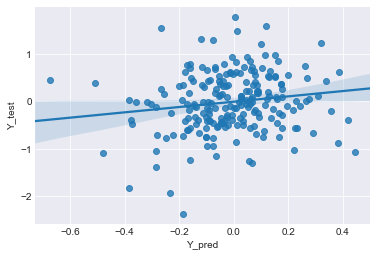

In [19]:
# 2017年のデータで予想し、グラフで予測具合を見る

Y_pred = linear_reg_model.predict(X_test) # 予測する

result = pd.DataFrame(Y_pred) # 予測
result.columns = ['Y_pred']
result['Y_test'] = Y_test

sns.set_style('darkgrid') 
sns.regplot(x='Y_pred', y='Y_test', data=result) #plotする


# 正答率を計算
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

2017年の利益合計：22.089


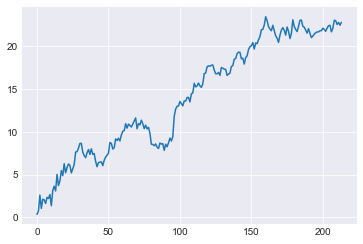

In [20]:
# 2017年の予測結果の合計を計算ーーーーーーーーー
# 前々日終値に比べて前日終値が高い場合は、買いとする
sum_2017 = 0

for i in range(0,len(Y_test)): # len()で要素数を取得しています
    if Y_pred[i] >= 0:
        sum_2017 += Y_test[i]
    else:
        sum_2017 -= Y_test[i]

print("2017年の利益合計：%1.3lf" %sum_2017) 


# 予測結果の総和グラフを描くーーーーーーーーー
total_return = np.zeros(len(Y_test))

if Y_pred[i] >=0: # 2017年の初日を格納
    total_return[0] = Y_test[i]
else:
    total_return[0] = -Y_test[i]

for i in range(1, len(result)): # 2017年の2日以降を格納
    if Y_pred[i] >=0:
        total_return[i] = total_return[i-1] + Y_test[i]
    else:
        total_return[i] = total_return[i-1] - Y_test[i]

plt.plot(total_return)